###COTTON PRICE PREDICTION

Cotton is a commodity, which is perhaps the most volatile among all the agricultural commodities traded. Due to high volatility in cotton prices, it is very difficult to predict the future market trend . Hence the main aim of this paper is to predict the market trend by analysing cotton’s price values since 1972.The time series data on daily price of cotton was collected from 22nd august 1972 to 22nd february 2021 for forecasting . It is said to consist of two attributes - the date and price of cotton on that day (in USD per pound). Thus an artificial Intelligence based solution is developed which may calculate the probability of future market trend on the basis of past years data . This is performed using the moving average , K-Nearest neighbour’s algorithm , Auto-Arima , Prophet and LSTM model. The model with a high accuracy rate will be considered as the one with best fit . 

In [5]:
# Importing libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #used for scaling each feature to a given range
from keras.models import Sequential #sequential-plain stack of layers
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.style.use('dark_background')

In [2]:
#Uploading the dataset
data = pd.read_excel('dataset.xlsx')
data.head()

,DATE,VALUES
0,1972-08-22,0.2673
1,1972-08-23,0.2703
2,1972-08-24,0.2706
3,1972-08-25,0.2722
4,1972-08-28,0.2704


In [3]:
#Data column is formatted and set as index
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
data = data.set_index('DATE')
data.head()

,VALUES
DATE,
1972-08-22,0.2673
1972-08-23,0.2703
1972-08-24,0.2706
1972-08-25,0.2722
1972-08-28,0.2704


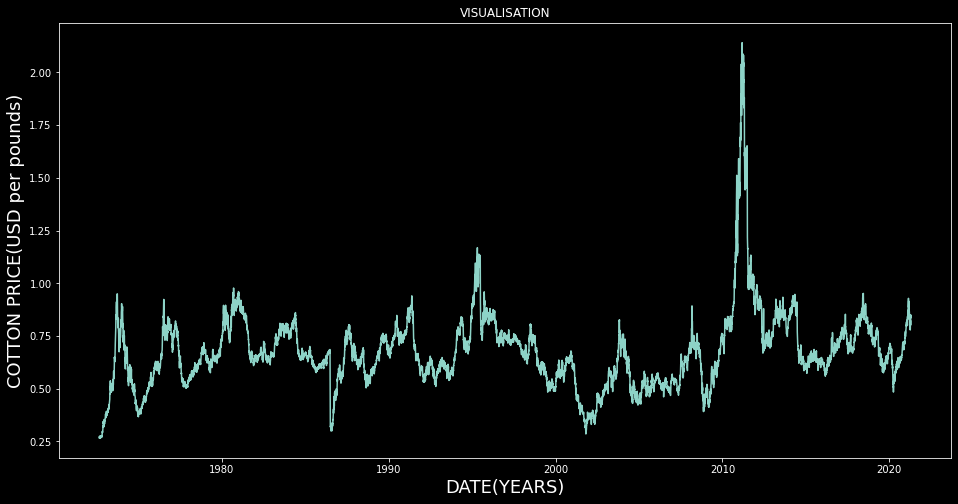

In [6]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('VISUALISATION')
plt.plot(data['VALUES'])
plt.xlabel('DATE(YEARS)',fontsize=18)
plt.ylabel('COTTON PRICE(USD per pounds)',fontsize=18)
plt.show()

In [7]:
#Create a new dataframe with only the 'Close' column
df = data.filter(['VALUES'])

In [8]:
#Converting the dataframe to a numpy array
dataset = df.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [9]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [10]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [11]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [14]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
Fit the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

9715/9715 [==============================] - 255s 24ms/step - loss: 0.0010


In [16]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [17]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [18]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [19]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [20]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("RMSE value : ",rmse)

RMSE value :  0.019690766750931697


In [21]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


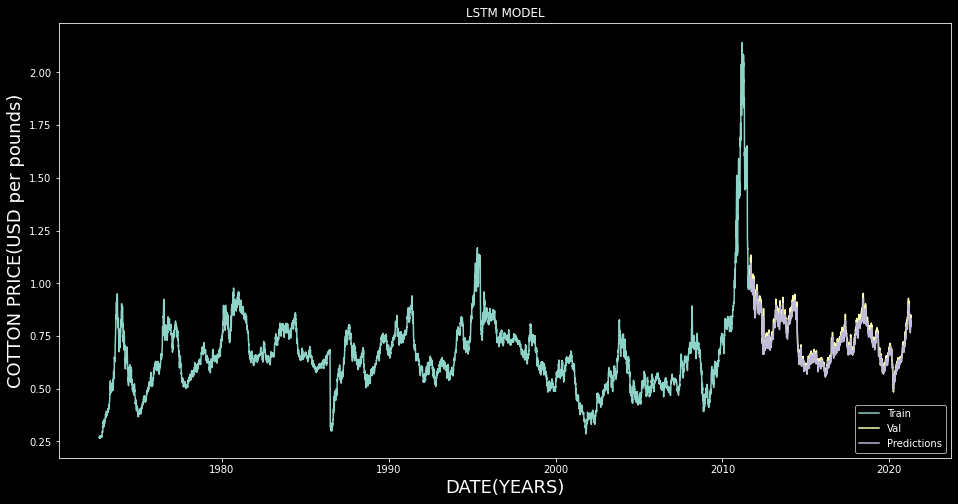

In [22]:
#Plotting the predicted values
plt.figure(figsize=(16,8))
plt.title('LSTM MODEL')
plt.xlabel('DATE(YEARS)', fontsize=18)
plt.ylabel('COTTON PRICE(USD per pounds)', fontsize=18)
plt.plot(train['VALUES'])
plt.plot(valid[['VALUES', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [23]:
print("The prediction values are:-")
valid

The prediction values are:-


,VALUES,Predictions
DATE,,
2011-08-23,1.0514,1.036552
2011-08-24,1.0462,1.024331
2011-08-25,1.0259,1.016215
2011-08-26,1.0392,1.001394
2011-08-29,1.0477,1.004801
...,...,...
2021-04-12,0.8014,0.803088
2021-04-13,0.8182,0.793173
2021-04-14,0.8420,0.795879


In [24]:
new_df = data.filter(['VALUES'])
val = new_df[-2000:].values
val_scaled = scaler.transform(val)
X_test = []
X_test.append(val_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print("The Predicted Value for Next Day is : ")
print(pred_price[0][0])


The Predicted Value for Next Day is : 
0.82256615


In [25]:
#Reshaping the values
val_x = []

val_pred = []

val_x = valid['VALUES']
val_pred = valid['Predictions']

val_x =val_x.to_numpy().reshape(-1,1)
val_pred=val_pred.to_numpy().reshape(-1,1)

In [26]:
cutoff = 0.9                             # decide on a cutoff limit
y_pred_classes = np.zeros_like(val_pred)    # initialise a matrix full with zeros
y_pred_classes[val_pred > cutoff] = 1  
y_test_classes = np.zeros_like(val_pred)
y_test_classes[val_x > cutoff] = 1
cm =confusion_matrix(y_test_classes, y_pred_classes)

In [27]:
#Calculating the model accuracy
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print("****LSTM MODEL****")
print("RMSE value : ",rmse)

TP, FP, FN, TN = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
ACC = (TP+TN)/(TP+TN+FP+FN)
print("ACCURACY : ",ACC)

****LSTM MODEL****
RMSE value :  0.019690766750931697
ACCURACY :  0.9631600491199345
